<a href="https://colab.research.google.com/github/suinkangme/A1_COMP472/blob/main/A1_COMP472.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A1 - COMP 472

Hyun Soo Kim 40174913

Suin Kang 40129337

In [107]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.neural_network import MLPClassifier

### Import the MyDrive library from CoLab

In [108]:
from google.colab import drive
drive.mount('/content/drive')

# the directory owns this notebook and dataset
import os
os.chdir('/content/drive/MyDrive/comp472/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Definition of train-test-repetition function
- For Classifier 3 & 4

In [110]:
def MLP_base_train_test_repetition(X, y, outputFile, target_names):
  accuracy = []
  macro_avg = []
  weighted_avg = []

  print("\nBase MLP Train-Test Repetition\n", file = outputFile)

  #repeat 5 times
  for i in range (0,5):

    #data is shuffled and scaled every time
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #base MLP
    #initialize new model with same hyperparameters
    model = MLPClassifier(hidden_layer_sizes = (100, 100,), activation = 'logistic', solver = 'sgd')

    #train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #for average accuracy / macro-average f1 score / weighted-average f1 score and variance calculation
    output = classification_report(y_test, y_pred, target_names = target_names, output_dict = True)
    accuracy.append(output['accuracy'])
    macro_avg.append(output['macro avg']['f1-score'])
    weighted_avg.append(output['weighted avg']['f1-score'])

    #print to text file. This would make it easier to validate the result of each model
    print(f'=== Iteration {i+1} === ', file = outputFile)
    print(f"(A) {model}\n", file = outputFile)
    print("(B) Confusion Matrix", file = outputFile)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    print(confusion_matrix_result, file = outputFile)

    print("\n(C,D) Classification Report", file = outputFile)
    print(classification_report(y_test, y_pred, target_names = target_names), file =outputFile)

  #append the calculation in the report
  print('(E) The result after 5 times of train-test repetition:' ,file = outputFile)
  print(f'\tThe average accuracy / variance: {np.mean(accuracy): 6.4f}, {np.var(accuracy): 6.6f}', file = outputFile)
  print(f'\tThe average macro-average f1 score / variance: {np.mean(macro_avg): 6.4f}, {np.var(macro_avg): 6.6f}', file = outputFile)
  print(f'\tThe average weighted-average f1 score / variance: {np.mean(weighted_avg): 6.4f}, {np.var(weighted_avg): 6.6f}', file = outputFile)
  print('\n', file = outputFile)
  outputFile.flush()

In [111]:
def MLP_top_train_test_repetition(param_grid, X, y, outputFile, target_names):
  accuracy = []
  macro_avg = []
  weighted_avg = []

  print("\nTop MLP Train-Test Repetition\n", file = outputFile)

  #repeat 5 times
  for i in range (0,5):

    #data is shuffled and scaled every time
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #top MLP
    #initialize new model with same hyperparameters
    gridcv = sk.model_selection.GridSearchCV(MLPClassifier(), param_grid = param_grid)
    gridcv.fit(X_train, y_train)

    #predict
    y_pred = gridcv.best_estimator_.predict(X_test)

    #for average accuracy / macro-average f1 score / weighted-average f1 score and variance calculation
    output = classification_report(y_test, y_pred, target_names = target_names, output_dict = True)
    accuracy.append(output['accuracy'])
    macro_avg.append(output['macro avg']['f1-score'])
    weighted_avg.append(output['weighted avg']['f1-score'])

    #print to text file. This would make it easier to validate the result of each model
    print(f'=== Iteration {i+1} === ', file = outputFile)
    print(f"(A) Best Parameters: {gridcv.best_params_}", file = outputFile)
    print("\n(B) Confusion Matrix", file = outputFile)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    print(confusion_matrix_result, file = outputFile)

    print("\n(C,D) Classification Report", file = outputFile)
    print(classification_report(y_test, y_pred, target_names = target_names), file =outputFile)

  #append the calculation in the report
  print('(E) The result after 5 times of train-test repetition:' ,file = outputFile)
  print(f'\tThe average accuracy / variance: {np.mean(accuracy): 6.4f}, {np.var(accuracy): 6.6f}', file = outputFile)
  print(f'\tThe average macro-average f1 score / variance: {np.mean(macro_avg): 6.4f}, {np.var(macro_avg): 6.6f}', file = outputFile)
  print(f'\tThe average weighted-average f1 score / variance: {np.mean(weighted_avg): 6.4f}, {np.var(weighted_avg): 6.6f}', file = outputFile)
  print('\n', file = outputFile)
  outputFile.flush()

## Dataset - 'penguins.csv'
- Goal : prediction of species
(Adelie, Gentoo, Chinstap)

In [112]:
outputFile = open ('penguin-classes.txt', 'w')
warnings.filterwarnings('ignore')

In [113]:
data_penguins = pd.read_csv('penguins.csv')
data_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


#### Data Preprocessing
- data encoding for categorical values: 'island', 'sex' column

In [114]:
from sklearn.preprocessing import OneHotEncoder

island = np.array(data_penguins['island']).reshape(-1, 1)
island_label = OneHotEncoder().fit_transform(island)
data_penguins['island'] = island_label.toarray()

df = pd.DataFrame({'island':['Torgersen','Biscoe','Dream']})
pd.get_dummies(df)

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,1,0,0
2,0,1,0


In [115]:
from sklearn.preprocessing import LabelEncoder

data_penguins['sex'] = LabelEncoder().fit_transform(data_penguins['sex'])

#### Plot the percentage of the instances

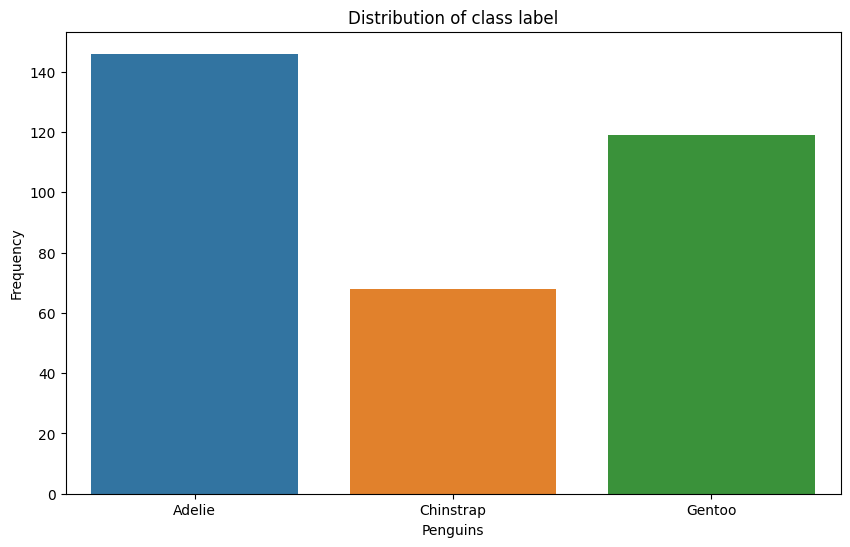

In [116]:
# Check the output class is balanced
penguins_labels = data_penguins['species']

plt.figure(figsize=(10, 6))
sns.countplot(x=penguins_labels)
plt.title('Distribution of class label')
plt.xlabel('Penguins')
plt.ylabel('Frequency')

# save as graphic
plt.savefig('penguin-classes.png')

#### Dataset split into training & test set

In [117]:
X = data_penguins.iloc[:, 1:].values
y = data_penguins.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train 4 different classifier

##### Classifier 1 - Base-DT

In [119]:
from sklearn.tree import DecisionTreeClassifier

# Base Decision Tree
classifier_1 = DecisionTreeClassifier()
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:
penguins_class = data_penguins.columns[0]
penguins_features = list(data_penguins.columns[1:])

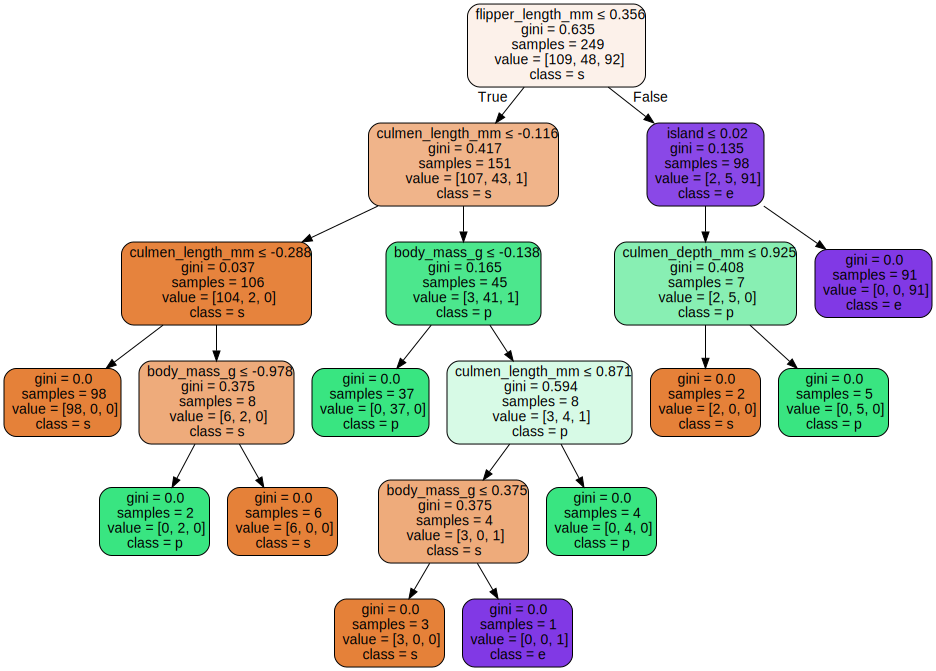

In [121]:
from sklearn import tree

dot_data = tree.export_graphviz(classifier_1,
                feature_names=penguins_features,
                class_names=penguins_class,
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [122]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 1 - Base DT', file = outputFile)
print(classifier_1, file = outputFile)
print('\n', file = outputFile)

In [123]:
# print classification report
y_pred = classifier_1.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print("(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.92      0.97      0.95        37
   Chinstrap       1.00      0.85      0.92        20
      Gentoo       0.96      1.00      0.98        27

    accuracy                           0.95        84
   macro avg       0.96      0.94      0.95        84
weighted avg       0.95      0.95      0.95        84

confusion matrix
 [[36  0  1]
 [ 3 17  0]
 [ 0  0 27]]


In [124]:
# repeat training & prediction 5 times for classifier 1
from sklearn.metrics import accuracy_score, f1_score

accuracy_baseDT = np.zeros(5)
macro_avg_baseDT = np.zeros(5)
weighted_avg_baseDT = np.zeros(5)

for i in range(5):

  #data is shuffled and scaled every iteration
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  #train and predict
  classifier_1.fit(X_train, y_train)
  y_pred = classifier_1.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_baseDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_baseDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_baseDT[i] = f1_score(y_test, y_pred, average='weighted')

# compute the average accuracy & variances
print(f'accuracy_baseDT: {accuracy_baseDT}')
Avg_accuracy = (np.sum(accuracy_baseDT))/5
accuracy_variance = np.var(accuracy_baseDT)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}')
print()

# compute the average macro-average F1 & the variance
print(f'macro_avg_baseDT: {macro_avg_baseDT}')
Avg_macro_avg = (np.sum(macro_avg_baseDT))/5
f1_macro_variance = np.var(macro_avg_baseDT)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}')
print()

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_baseDT: {weighted_avg_baseDT}')
Avg_weighted_avg = (np.sum(weighted_avg_baseDT))/5
f1_weighted_variance = np.var(weighted_avg_baseDT)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}')

accuracy_baseDT: [0.97619048 0.94047619 0.96428571 0.96428571 1.        ]
average accuracy: 0.9690, variance: 0.000374

macro_avg_baseDT: [0.97555556 0.93108898 0.95324918 0.95848022 1.        ]
average macro-average F1: 0.9637, variance: 0.000532

weighted_avg_baseDT: [0.97619048 0.94074149 0.96396848 0.96361424 1.        ]
average weighted-average F1: 0.9689, variance: 0.000373


In [125]:
# print the performance result to outputfile
print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

##### Classifier 2 - Top-DT

In [126]:
# Top Decision Tree - decision tree using gridsearch(hyperparameter search)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10]
}

classifier_2 = GridSearchCV(DecisionTreeClassifier(), parameters)
classifier_2.fit(X_train, y_train)

print(f'best parameters: {classifier_2.best_params_}')

best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [127]:
penguins_class = data_penguins.columns[0]
penguins_features = list(data_penguins.columns[1:])

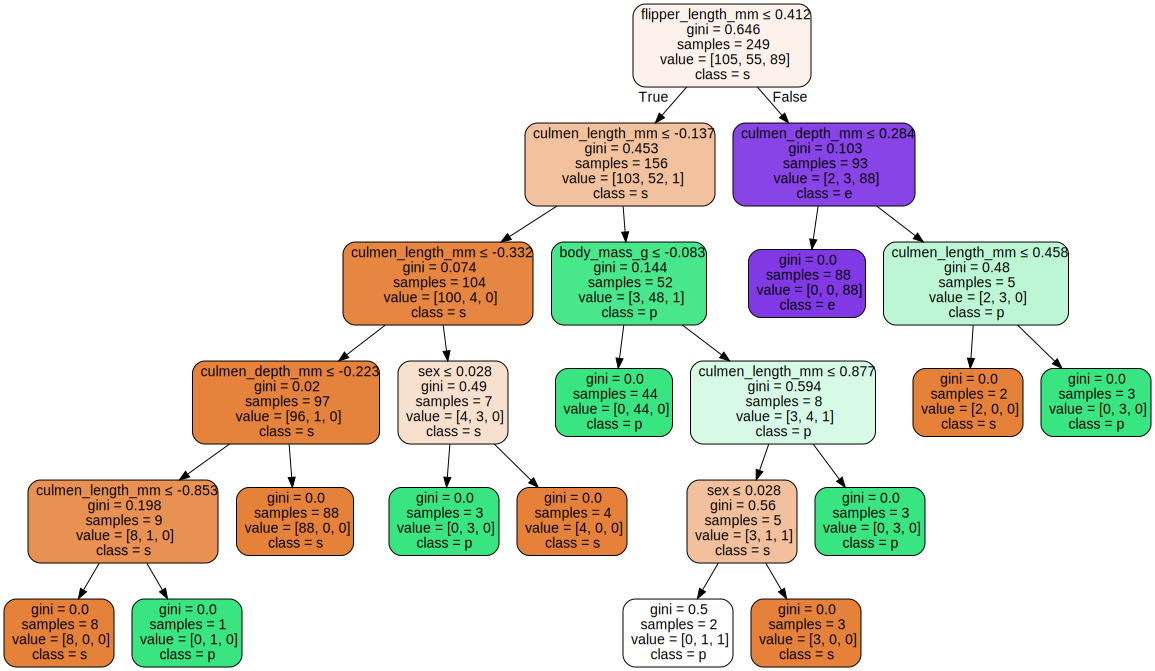

In [128]:
from sklearn.tree import export_graphviz
from IPython.display import display

dot_data = export_graphviz(classifier_2.best_estimator_,
                          feature_names=penguins_features,
                          class_names=penguins_class,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

In [129]:
# print to the output file
print('\n', file = outputFile)
print('**************************************************************', file = outputFile)
print('(A) Classifier 2 - Top DT', file = outputFile)
print(classifier_2, file = outputFile)
print('\n', file = outputFile)
print(f'best parameters: {classifier_2.best_params_}\n', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

In [130]:
# print classification report
y_pred = classifier_2.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print("(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['Adelie', 'Chinstrap', 'Gentoo']), file = outputFile)
confusion_matrix_result =np.array2string(confusion_mat)
outputFile.flush()

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

confusion matrix
 [[41  0  0]
 [ 0 13  0]
 [ 0  0 30]]


In [131]:
# repeat training & grid search & prediction 5 times for classifier 2
from sklearn.metrics import accuracy_score, f1_score

accuracy_TopDT = np.zeros(5)
macro_avg_TopDT = np.zeros(5)
weighted_avg_TopDT = np.zeros(5)

print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)

for i in range(5):

  #data is shuffled and scaled every iteration
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  #grid search
  classifier_2 = GridSearchCV(DecisionTreeClassifier(), parameters)
  classifier_2.fit(X_train, y_train)

  print(f'best parameters for iteration{i+1}: {classifier_2.best_params_}',file = outputFile)
  print(f'best parameters for iteration{i+1}: {classifier_2.best_params_}')

  y_pred = classifier_2.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_TopDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_TopDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_TopDT[i] = f1_score(y_test, y_pred, average='weighted')

print()

# compute the average accuracy & variances
print(f'accuracy_TopDT: {accuracy_TopDT}')
Avg_accuracy = (np.sum(accuracy_TopDT))/5
accuracy_variance = np.var(accuracy_TopDT)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}')
print()

# compute the average macro-average F1 & the variance
print(f'macro_avg_TopDT: {macro_avg_TopDT}')
Avg_macro_avg = (np.sum(macro_avg_TopDT))/5
f1_macro_variance = np.var(macro_avg_TopDT)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}')
print()

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_TopDT: {weighted_avg_TopDT}')
Avg_weighted_avg = (np.sum(weighted_avg_TopDT))/5
f1_weighted_variance = np.var(weighted_avg_TopDT)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}')

best parameters for iteration1: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
best parameters for iteration2: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
best parameters for iteration3: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
best parameters for iteration4: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
best parameters for iteration5: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

accuracy_TopDT: [0.92857143 0.9047619  0.97619048 0.96428571 0.95238095]
average accuracy: 0.9452, variance: 0.000658

macro_avg_TopDT: [0.91538861 0.8467227  0.96483516 0.95869787 0.94824561]
average macro-average F1: 0.9268, variance: 0.001893

weighted_avg_TopDT: [0.92668853 0.89761282 0.97676609 0.96420955 0.95172306]
average weighted-average F1: 0.9434, variance: 0.000798


In [132]:
# print the performance result to outputfile
print('\n', file = outputFile)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

##### Classifier 3 - Base-MLP

In [133]:
#Train Classifier 3
mlp_base_penguin = MLPClassifier(hidden_layer_sizes =(100, 100,), activation = 'logistic', solver = 'sgd')
mlp_base_penguin.fit(X_train, y_train)

#print to the output file
print('\n**************************************************************', file = outputFile)
print('(A) Classifier 3 - Base MLP', file = outputFile)
print(mlp_base_penguin, file = outputFile)
print('\n', file = outputFile)

Metrics for Classifier 3

In [134]:
#predict with Base MLP
y_pred_base_mlp = mlp_base_penguin.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_base_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']))
print(confusion_matrix(y_test, y_pred_base_mlp))

#print the result to the output file
print("(B) Confusion Matrix", file = outputFile)
confusion_matrix_result =np.array2string(confusion_matrix(y_test, y_pred_base_mlp))
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print("(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred_base_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)

outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.46      1.00      0.63        39
      Gentoo       0.00      0.00      0.00        20
    Chinstap       0.00      0.00      0.00        25

    accuracy                           0.46        84
   macro avg       0.15      0.33      0.21        84
weighted avg       0.22      0.46      0.29        84

[[39  0  0]
 [20  0  0]
 [25  0  0]]


In [135]:
#repeat train-test 5 times
MLP_base_train_test_repetition(X, y, outputFile, ['Adelie', 'Gentoo', 'Chinstap'])

##### Classifier 4 - Top-MLP

In [136]:
#create grid for each hyperparamter we want to test
activation_grid = np.array(['logistic', 'tanh', 'relu'])
neurons_tuple_grid = np.array([(30, 50,), (10, 10, 10,)], dtype = 'object')
solver_grid = np.array(['adam', 'sgd'])

#create parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': neurons_tuple_grid, 'activation': activation_grid, 'solver': solver_grid}

#create grid cv object and do the search
mlp_top_penguin = MLPClassifier()
gridcv = sk.model_selection.GridSearchCV(mlp_top_penguin, param_grid = param_grid)
gridcv.fit(X_train, y_train)

#print the result here on notebook
print(f'best parameters: {gridcv.best_params_}')

#print the result to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 4 - Top MLP', file = outputFile)
print(f'best parameters: {gridcv.best_params_}\n', file = outputFile)
outputFile.flush()

best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Metrics for Classifier 4 - Top MLP

In [137]:
#predict
y_pred_top_mlp = gridcv.best_estimator_.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_top_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']))
print(confusion_matrix(y_test, y_pred_top_mlp))

#print the result to the output file
print("(B) Confusion Matrix", file = outputFile)
confusion_matrix_result =np.array2string(confusion_matrix(y_test, y_pred_top_mlp))
print(confusion_matrix_result, file = outputFile)
print("\n(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred_top_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)

outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        39
      Gentoo       1.00      0.90      0.95        20
    Chinstap       1.00      1.00      1.00        25

    accuracy                           0.98        84
   macro avg       0.98      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84

[[39  0  0]
 [ 2 18  0]
 [ 0  0 25]]


In [138]:
MLP_top_train_test_repetition(param_grid, X, y, outputFile,['Adelie', 'Gentoo', 'Chinstap'])

In [139]:
outputFile.close()

## Dataset - 'abalone.csv'
- Goal : prediction of sex

In [166]:
outputFile = open('abalone-performance.txt', 'w')

In [167]:
data_abalone = pd.read_csv('abalone.csv')
data_abalone.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


#### Plot the percentage of the instances

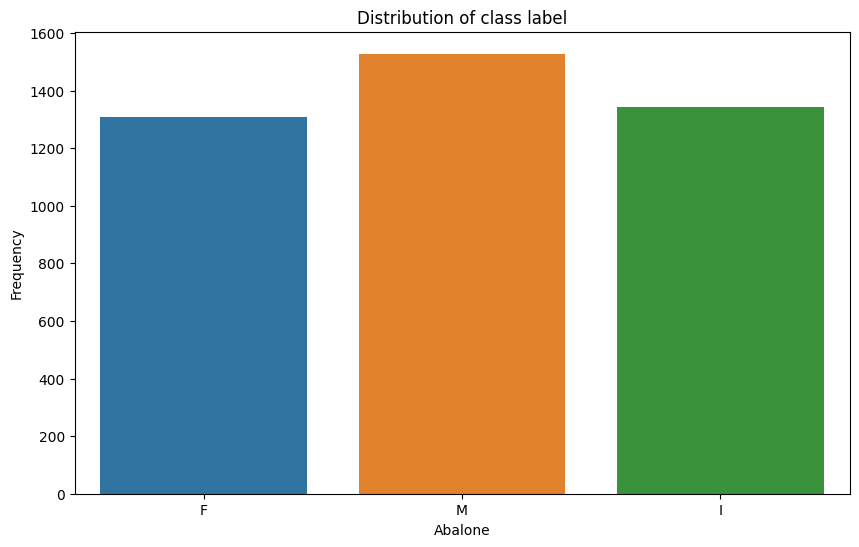

In [168]:
# Check the output class is balanced
abalone_labels = data_abalone['Type']

plt.figure(figsize=(10, 6))
sns.countplot(x=abalone_labels)
plt.title('Distribution of class label')
plt.xlabel('Abalone')
plt.ylabel('Frequency')

# save as graphic
plt.savefig('abalone-classes.png')


#### Dataset split into training & test set

In [169]:
X = data_abalone.iloc[:, 1:].values
y = data_abalone.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [170]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train and test 4 different classifiers

##### Classifier 1 - Base-DT

In [171]:
from sklearn.tree import DecisionTreeClassifier

# Base Decision Tree
classifier_1 = DecisionTreeClassifier(max_depth=3)
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [172]:
abalone_class = data_abalone.columns[0]
abalone_features = list(data_abalone.columns[1:])

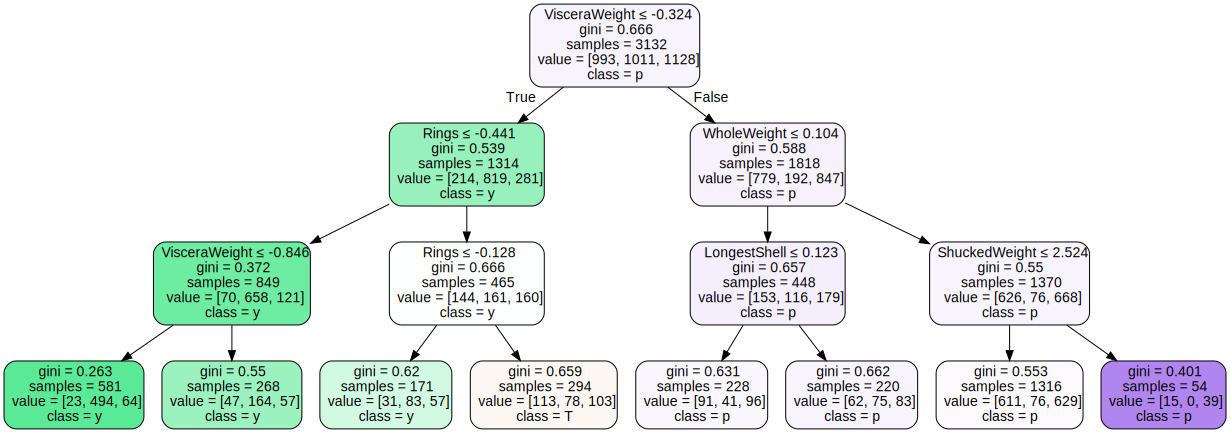

In [173]:
dot_data = tree.export_graphviz(classifier_1,
                feature_names=abalone_features,
                class_names=abalone_class,
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [174]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 1 - Base DT', file = outputFile)
print(classifier_1, file = outputFile)
print('\n', file = outputFile)

In [175]:
# print classification report
y_pred = classifier_1.predict(X_test)
confusion_mat= confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['F', 'M', 'I']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print('(C,D) Classification Report', file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['F', 'M', 'I']), file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.34      0.08      0.13       314
           M       0.75      0.75      0.75       331
           I       0.49      0.78      0.60       400

    accuracy                           0.56      1045
   macro avg       0.53      0.54      0.49      1045
weighted avg       0.53      0.56      0.51      1045

confusion matrix
 [[ 25  23 266]
 [ 20 249  62]
 [ 28  61 311]]


In [176]:
# repeat training & prediction 5 times for classifier 1
from sklearn.metrics import accuracy_score, f1_score

accuracy_baseDT = np.zeros(5)
macro_avg_baseDT = np.zeros(5)
weighted_avg_baseDT = np.zeros(5)

for i in range(5):

  #data is shuffeld and scaled every iteration
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  #train and predict
  classifier_1.fit(X_train, y_train)
  y_pred = classifier_1.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_baseDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_baseDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_baseDT[i] = f1_score(y_test, y_pred, average='weighted')

# compute the average accuracy & variances
print(f'accuracy_baseDT: {accuracy_baseDT}')
Avg_accuracy = (np.sum(accuracy_baseDT))/5
accuracy_variance = np.var(accuracy_baseDT)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}')
print()

# compute the average macro-average F1 & the variance
print(f'macro_avg_baseDT: {macro_avg_baseDT}')
Avg_macro_avg = (np.sum(macro_avg_baseDT))/5
f1_macro_variance = np.var(macro_avg_baseDT)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}')
print()

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_baseDT: {weighted_avg_baseDT}')
Avg_weighted_avg = (np.sum(weighted_avg_baseDT))/5
f1_weighted_variance = np.var(weighted_avg_baseDT)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}')


accuracy_baseDT: [0.53684211 0.54545455 0.53110048 0.5215311  0.50813397]
average accuracy: 0.5286, variance: 0.000165

macro_avg_baseDT: [0.52065439 0.43627652 0.52539969 0.48329785 0.51691877]
average macro-average F1: 0.4965, variance: 0.001127

weighted_avg_baseDT: [0.52218637 0.4561267  0.51568384 0.46727911 0.51148745]
average weighted-average F1: 0.4946, variance: 0.000743


In [177]:
# print the performance result to outputfile
print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}', file = outputFile)
outputFile.flush()

##### Classifier 2 - Top-DT

In [178]:
# Top Decision Tree - decision tree using gridsearch(hyperparameter search)
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10]
}

classifier_2 = GridSearchCV(DecisionTreeClassifier(max_depth=3), parameters)
classifier_2.fit(X_train, y_train)

print(f'best parameters: {classifier_2.best_params_}')

best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [179]:
abalone_class = data_abalone.columns[0]
abalone_features = list(data_abalone.columns[1:])

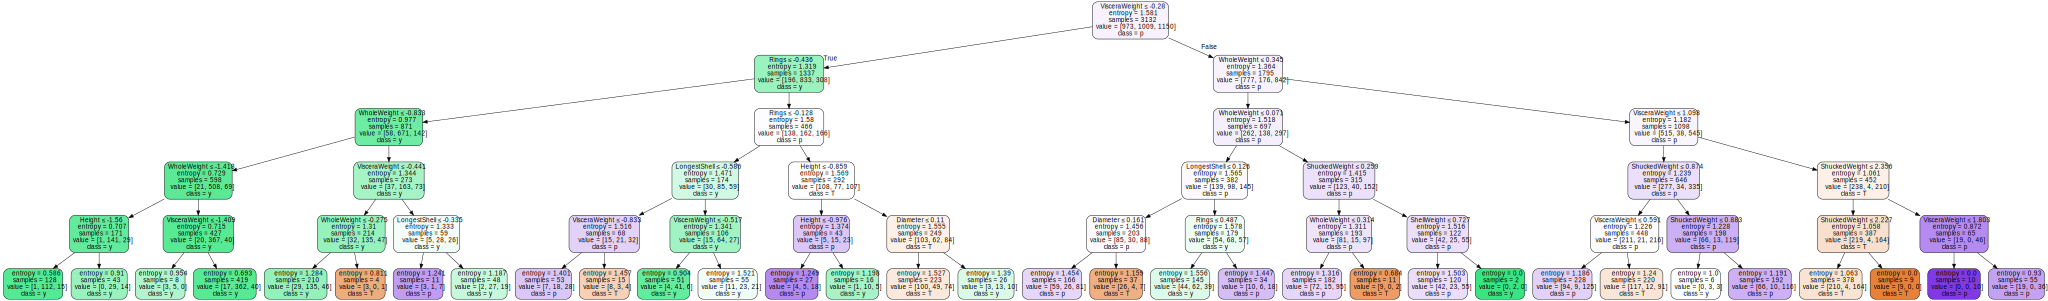

In [180]:
from sklearn.tree import export_graphviz
from IPython.display import display

dot_data = export_graphviz(classifier_2.best_estimator_,
                          feature_names=abalone_features,
                          class_names=abalone_class,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

In [181]:
# print to the output file
print('\n', file = outputFile)
print('**************************************************************', file = outputFile)
print('(A) Classifier 2 - Top DT', file = outputFile)
print(classifier_2, file = outputFile)
print('\n', file = outputFile)
print(f'best parameters: {classifier_2.best_params_}\n', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

In [182]:
# print classification report
y_pred = classifier_2.predict(X_test)
confusion_mat= confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['F', 'M', 'I']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print('(C,D) Classification Report', file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['F', 'M', 'I']), file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.46      0.45      0.46       334
           M       0.69      0.75      0.72       333
           I       0.50      0.47      0.48       378

    accuracy                           0.55      1045
   macro avg       0.55      0.56      0.55      1045
weighted avg       0.55      0.55      0.55      1045

confusion matrix
 [[151  50 133]
 [ 37 250  46]
 [138  63 177]]


In [183]:
# repeat training & grid search & prediction 5 times for classifier 2
from sklearn.metrics import accuracy_score, f1_score

accuracy_TopDT = np.zeros(5)
macro_avg_TopDT = np.zeros(5)
weighted_avg_TopDT = np.zeros(5)

print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)

for i in range(5):

  #data is shuffeld and scaled every iteration
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  #grid search
  classifier_2 = GridSearchCV(DecisionTreeClassifier(), parameters)
  classifier_2.fit(X_train, y_train)

  print(f'best parameters for iteration{i+1}: {classifier_2.best_params_}',file = outputFile)
  print(f'best parameters for iteration{i+1}: {classifier_2.best_params_}')

  y_pred = classifier_2.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_TopDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_TopDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_TopDT[i] = f1_score(y_test, y_pred, average='weighted')

print()
# compute the average accuracy & variances
print(f'accuracy_TopDT: {accuracy_TopDT}')
Avg_accuracy = (np.sum(accuracy_TopDT))/5
accuracy_variance = np.var(accuracy_TopDT)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}')
print()

# compute the average macro-average F1 & the variance
print(f'macro_avg_TopDT: {macro_avg_TopDT}')
Avg_macro_avg = (np.sum(macro_avg_TopDT))/5
f1_macro_variance = np.var(macro_avg_TopDT)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}')
print()

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_TopDT: {weighted_avg_TopDT}')
Avg_weighted_avg = (np.sum(weighted_avg_TopDT))/5
f1_weighted_variance = np.var(weighted_avg_TopDT)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}')

best parameters for iteration1: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
best parameters for iteration2: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
best parameters for iteration3: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
best parameters for iteration4: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
best parameters for iteration5: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

accuracy_TopDT: [0.54162679 0.55598086 0.53779904 0.55789474 0.5645933 ]
average accuracy: 0.5516, variance: 0.000104

macro_avg_TopDT: [0.5094239  0.53762512 0.53891398 0.54603789 0.51493476]
average macro-average F1: 0.5294, variance: 0.000209

weighted_avg_TopDT: [0.51491204 0.54054234 0.52782298 0.5474663  0.52226975]
average weighted-average F1: 0.5306, variance: 0.000141


In [184]:
# print the performance result to outputfile
print('\n', file = outputFile)
print(f'average accuracy: {Avg_accuracy:.4f}, variance: {accuracy_variance:.6f}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg:.4f}, variance: {f1_macro_variance:.6f}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg:.4f}, variance: {f1_weighted_variance:.6f}', file = outputFile)
outputFile.flush()

##### Classifier 3 - Base-MLP

In [185]:
#Train Classifier 3
mlp_base_abalone = MLPClassifier(hidden_layer_sizes =(100, 100,), activation = 'logistic', solver = 'sgd')
mlp_base_abalone.fit(X_train, y_train)

#print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 3 - Base MLP', file = outputFile)
print(mlp_base_abalone, file = outputFile)

Metrics for Classifier 3

In [186]:
#predict with Base MLP
y_pred_base_mlp = mlp_base_abalone.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_base_mlp, target_names = ['F', 'M', 'I']))
print(confusion_matrix(y_test, y_pred_base_mlp))

#print the result to the output file
print("\n(B) Confusion Matrix", file = outputFile)
confusion_matrix_result = np.array2string(confusion_matrix(y_test, y_pred_base_mlp))
print(confusion_matrix_result, file = outputFile)
print("\n(C, D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred_base_mlp, target_names = ['F', 'M', 'I']), file = outputFile)

outputFile.flush()

              precision    recall  f1-score   support

           F       0.33      0.02      0.04       320
           M       0.65      0.78      0.71       334
           I       0.46      0.74      0.57       391

    accuracy                           0.53      1045
   macro avg       0.48      0.51      0.44      1045
weighted avg       0.48      0.53      0.45      1045

[[  7  52 261]
 [  1 261  72]
 [ 13  90 288]]


In [187]:
MLP_base_train_test_repetition(X, y, outputFile, ['F', 'M', 'I'])

##### Classifier 4 - Top-MLP

In [188]:
#create grid for each hyperparamter we want to test
activation_grid = np.array(['logistic', 'tanh', 'relu'])
neurons_tuple_grid = np.array([(30, 50,), (10, 10, 10,)])
solver_grid = np.array(['adam', 'sgd'])

#create parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': neurons_tuple_grid, 'activation': activation_grid, 'solver': solver_grid}

#create grid cv object and search
mlp_top_abalone = MLPClassifier()
gridcv = sk.model_selection.GridSearchCV(mlp_top_abalone, param_grid = param_grid)
gridcv.fit(X_train, y_train)

#print the result here on notebook
print(f'best parameters: {gridcv.best_params_}')

#print the result to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 4 - Top MLP', file = outputFile)
print(f'best parameters: {gridcv.best_params_}', file = outputFile)
outputFile.flush()

best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Metrics for Classifier 4

In [189]:
#predict
y_pred_top_mlp = gridcv.best_estimator_.predict(X_test)

#print results here - confusion matrix and classification report
print(classification_report(y_test, y_pred_top_mlp, target_names = ['F', 'M', 'I']))
print(confusion_matrix(y_test, y_pred_top_mlp))

#print the result to output file
print("\n(B) Confusion Matrix", file = outputFile)
confusion_matrix_result = np.array2string(confusion_matrix(y_test, y_pred_top_mlp))
print(confusion_matrix_result, file = outputFile)
print("\n(C, D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred_top_mlp, target_names = ['F', 'M', 'I']), file = outputFile)

outputFile.flush()

              precision    recall  f1-score   support

           F       0.49      0.41      0.44       320
           M       0.71      0.79      0.75       334
           I       0.49      0.51      0.50       391

    accuracy                           0.57      1045
   macro avg       0.56      0.57      0.56      1045
weighted avg       0.56      0.57      0.56      1045

[[130  38 152]
 [ 16 264  54]
 [121  70 200]]


In [190]:
MLP_top_train_test_repetition(param_grid, X, y, outputFile, ['F', 'M', 'I'])

In [191]:
outputFile.close()